# Navigation

---
# TRAINING

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment. On Windows you should see the Unity environment popping up.

In [2]:
env = UnityEnvironment(file_name="Banana/Banana.exe")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]
                   
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)
action_size = brain.vector_action_space_size
print("state size:", state_size)
print("action size:", action_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


state size: 37
action size: 4


### 3. Train the Agent
Let's train the agent.  
The training will stop if desired score or n_episodes (max) is reached. Each episode can last at most max_t steps.  
The policy randomness is regulated via eps parameter: eps = eps_max = 1 means the action selection (policy) is completely randomic; eps = 0 means the policy is greedy (best value action ever selected). Here, eps is maximum at the beginning (eps_start = eps_max) and decays by eps_decay after each episode, till eps_end.

In [3]:
import random
import torch
from collections import namedtuple, deque
from agent import Agent
agent = Agent(state_size, action_size, seed=0)

def dqn(n_episodes=1800, desired_score= 16.0, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.993):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1): 
        env_info = env.reset(train_mode=True)[brain_name]    # reset the environment
        state = env_info.vector_observations[0]              # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                   # pick an action 
            action = int(action)
            
            env_info   = env.step(action)[brain_name]        # make the environment react
            next_state = env_info.vector_observations[0]     # get the next state
            reward     = env_info.rewards[0]                 # get the reward
            done       = env_info.local_done[0]              # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)  # pass the env reaction to the agent and let it learn
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=desired_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

Episode 100	Average Score: 1.24
Episode 200	Average Score: 5.10
Episode 300	Average Score: 8.62
Episode 400	Average Score: 11.32
Episode 500	Average Score: 14.33
Episode 600	Average Score: 14.70
Episode 698	Average Score: 16.00
Environment solved in 598 episodes!	Average Score: 16.00


In [4]:
env.close()

### 4. Was training successful?
If training was successful, the desired score has been achieved.
Let's see how: episode by episode (on average).  
If training failed, run it again (you could also play with parameters before).

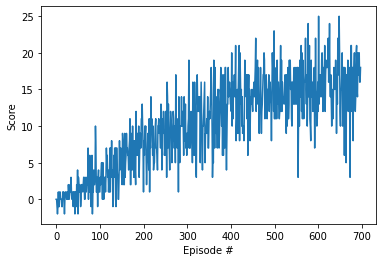

In [5]:
# Install necessary packages...
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

#... plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# TESTING
### 5. Agent in action!
Let's see how the trained agent play!
We'll load the trained model, checkpoint.pth .

Note: this step can be run apart from the previous TRAINING steps; checkpoint.pth contains a pre-trained model.


In [1]:
from unityagents import UnityEnvironment

env = UnityEnvironment(file_name="Banana/Banana.exe")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)
action_size = brain.vector_action_space_size

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
from agent import Agent
agent = Agent(state_size, action_size, seed=0)
agent.load(path='checkpoint.pth')

In [ ]:
import time

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
for t in range(1000):
    action = agent.act(state)
    action = int(action)
    env_info   = env.step(action)[brain_name]      # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward     = env_info.rewards[0]               # get the reward
    done       = env_info.local_done[0]            # see if episode has finished
    
    agent.step(state, action, reward, next_state, done)
    time.sleep(0.1)
    state = next_state
    score += reward
    if done:
        break         
                
print("Score: {}".format(score))

In [ ]:
env.close()